# Predict CLTV with linear regression

<a id='table'></a>
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dw">Data wrangling</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#datacleaning">Data cleaning and transformation</a></li>
<li><a href="#dataanalysis">Data analysis</a></li>
<li><a href="#predictcltv">Predict 3-month CLTV</a></li>
<li><a href="#summary">Summary</a></li>
<li><a href="#reference">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### CLTV

**Customer Lifetime Value (CLTV)** represents the total amount of money a customer is expected to spend in a business during his/her lifetime. This is an important metric to monitor because it helps to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

### Dataset

For this analysis I am using a public dataset from UCI Machine Learning Repositiry, which can found [here](http://archive.ics.uci.edu/ml/index.php). This dataset contains information on transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute information:**

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal
* Quantity: The quantities of each product (item) per transaction. Numeric
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated
* UnitPrice: Unit price. Numeric, Product price per unit in sterling
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer
* Country: Country name. Nominal, the name of the country where each customer resides.

<a id='dw'></a>
## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


Bad key text.latex.preview in file C:\Users\amits\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\amits\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\amits\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
os.chdir(r'G:\My Drive\Mccombs MSBA\Data Science Programming - Su22\HW\Group Project')
df = pd.read_csv('online_retail_II.csv')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


*Description* and *CustomerID* columns have NULL values

In [5]:
df = df.rename(columns = {'Customer ID': 'CustomerID', 'Invoice':'InvoiceNo','Price': 'UnitPrice'})

<a id='eda'></a>
## Exploratory data analysis (EDA)

Let us have a look at the data and decide whether we need any data cleaning and data transformation for further analysis.

### NULL values

In [6]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 247389
Percentage of missing values in the dataset: 2.897176801693132


In [7]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 4382
Percentage of missing values in 'Description' column: 0.4105414143723223


In [8]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 243007
Percentage of missing values in 'CustomerID' column: 22.766872999172733


About 25% of CustomerIDs is missing

### Duplicates

In [9]:
# Check the number of duplicated values
df.duplicated().sum().sum()

34335

In [10]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [11]:
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
390,489517,84951A,S/4 PISTACHIO LOVEBIRD COASTERS,1,2009-12-01 11:34:00,2.55,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
657,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom
658,489529,22036,DINOSAUR BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom


It seems that products, which were bought together in one invoice, were considered as duplicates. However, there are no duplicates, if we look at the *Description* column

### Number of unique customers

In [12]:
df['CustomerID'].nunique()

5942

### Number of purchases

In [13]:
df['InvoiceNo'].nunique()

53628

### Period of time

In [14]:
df['InvoiceDate'].min()

'2009-12-01 07:45:00'

In [15]:
df['InvoiceDate'].max()

'2011-12-09 12:50:00'

### Country

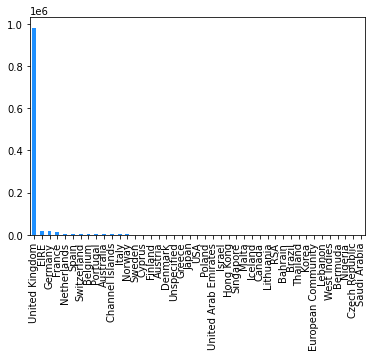

In [16]:
df['Country'].value_counts().plot.bar(color='dodgerblue');

In [17]:
df['Country'].nunique()

43

So we have approximately 1 year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the UK)

### Quantity and unit price of the products

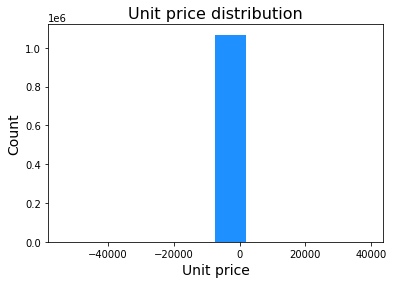

In [18]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove negative records and outliers and look at the price distribution.

In [19]:
df['UnitPrice'].describe(percentiles=[.99])

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
50%      2.100000e+00
99%      1.800000e+01
max      3.897000e+04
Name: UnitPrice, dtype: float64

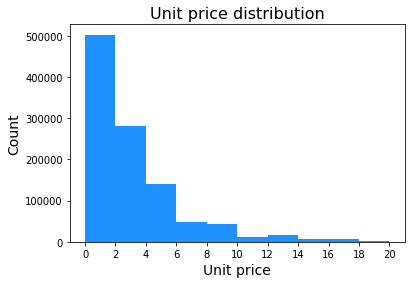

In [20]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

The price for most of the products is equal or less than 10£

Let's look at the negative values in *UnitPrice*

In [21]:
df[df['InvoiceNo'].str.startswith('c')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


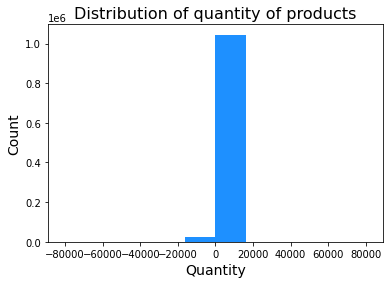

In [22]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity', color='dodgerblue')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [23]:
df['Quantity'].describe(percentiles=[.99])

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
50%      3.000000e+00
99%      1.000000e+02
max      8.099500e+04
Name: Quantity, dtype: float64

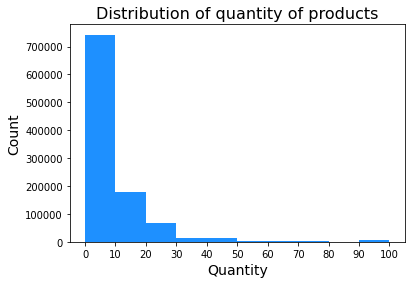

In [24]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In most cases customers buy less than 50 items per order.

Let's look at the negative values in *Quantity*

In [25]:
neg_quantity = df[df['Quantity']<0]

In [26]:
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [27]:
neg_quantity.shape

(22950, 8)

In [28]:
print("The percentage of records with negative Quantity:", neg_quantity.shape[0]*100/df.shape[0])

The percentage of records with negative Quantity: 2.1501427338760375


There are 10,624 raws with negative *Quantity* values, which is about 2% out of the total number of records in the dataframe.

<a id='datacleaning'></a>
## Data cleaning and transformation

### Drop NULL values

We have NULL records in columns *CustomerId* and *Description*. Because we are planning to predict CLTV, we need records for each customer ID to proceed calculations. Let's drop rows containing NULL values.

In [29]:
df.dropna(subset=['CustomerID'], inplace=True)

In [30]:
df.shape

(824364, 8)

In [31]:
# Let's check NULL records in the CustomerId column
df['CustomerID'].isnull().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [33]:
df[(df['StockCode'].str.contains('22087')) & (df['CustomerID'] == 16321.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
187,489450,22087,PAPER BUNTING WHITE LACE,12,2009-12-01 10:36:00,2.95,16321.0,Australia
590070,541657,22087,PAPER BUNTING WHITE LACE,6,2011-01-20 12:11:00,2.95,16321.0,Australia
609731,543372,22087,PAPER BUNTING WHITE LACE,18,2011-02-07 15:01:00,2.95,16321.0,Australia
609761,C543375,22087,PAPER BUNTING WHITE LACE,-18,2011-02-07 15:09:00,2.95,16321.0,Australia
609763,543376,22087,PAPER BUNTING WHITE LACE,18,2011-02-07 15:10:00,2.95,16321.0,Australia


### Handle negative quantity

In [34]:
df = df.loc[df['Quantity'] > 0]

In [35]:
# Let's check negative records
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Remove rows with negative price

In [36]:
df = df.loc[df['UnitPrice'] > 0]

In [37]:
# Let's check negative records
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Handle incomplete data

Period of time for the purchase records is from December 1, 2010 to December  9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month.

In [38]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [39]:
# Let's check the time period
df['InvoiceDate'].min(), df['InvoiceDate'].max()

('2009-12-01 07:45:00', '2011-11-30 17:37:00')

### Calculate total sales

Let us create a column for the total sales value for each transaction

In [40]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [41]:
df_orders = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})

In [42]:
df_orders.head(8)

Sales          InvoiceDate
CustomerID InvoiceNo                            
12346.0    491725      45.0  2009-12-14 08:34:00
           491742      22.5  2009-12-14 11:00:00
           491744      22.5  2009-12-14 11:02:00
           492718      22.5  2009-12-18 10:47:00
           492722       1.0  2009-12-18 10:55:00
           493410      22.5  2010-01-04 09:24:00
           493412      22.5  2010-01-04 09:53:00
           494450      22.5  2010-01-14 13:50:00

In [43]:
df_orders['InvoiceDate'].max(), df_orders['InvoiceDate'].min()

('2011-11-30 17:37:00', '2009-12-01 07:45:00')

In [44]:
df_orders['InvoiceDate'] = pd.to_datetime(df_orders['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [45]:
df_orders

Sales         InvoiceDate
CustomerID InvoiceNo                             
12346.0    491725       45.00 2009-12-14 08:34:00
           491742       22.50 2009-12-14 11:00:00
           491744       22.50 2009-12-14 11:02:00
           492718       22.50 2009-12-18 10:47:00
           492722        1.00 2009-12-18 10:55:00
...                       ...                 ...
18287.0    523290       30.60 2010-09-21 12:19:00
           534346      381.50 2010-11-22 11:51:00
           554065      765.28 2011-05-22 10:39:00
           570715     1001.32 2011-10-12 10:23:00
           573167       70.68 2011-10-28 09:29:00

[36191 rows x 2 columns]

<a id='dataanalysis'></a>
## Data analysis

In order to predict and calculate CLTV, we have to estimate the **frequency**, **recency**, and **total amount** of purchases by each customer. We are going to determine basic information about each customer's average and lifetime purchase amount, as well as each customer's duration and frequency of purchase.

In [46]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [47]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [48]:
df_summary.head()

Sales                                                InvoiceDate  \
               min       max       sum          avg count                 min   
CustomerID                                                                      
12346.0       1.00  77183.60  77556.46  6463.038333  12.0 2009-12-14 08:34:00   
12347.0     382.52   1423.58   5408.50   772.642857   7.0 2010-10-31 14:20:00   
12348.0     222.16    892.80   2019.40   403.880000   5.0 2010-09-27 14:59:00   
12349.0     200.00   1757.55   4428.69  1107.172500   4.0 2010-04-29 13:20:00   
12350.0     334.40    334.40    334.40   334.400000   1.0 2011-02-02 16:01:00   

                                                                     
                           max purchase_duration purchase_frequency  
CustomerID                                                           
12346.0    2011-01-18 10:01:00               400          33.333333  
12347.0    2011-10-31 12:25:00               364          52.000000  
12348.0    2011-09-25 13:13:00               362          72.400000  
12349.0    2011-11-21 09:51:00               570         142.500000  
12350.0    2011-02-02 16:01:00                 0           0.000000

This data gives us an idea on the purchases each customer made.

Let us have a closer look at the **repeat customers**. Particularly, we are interested in the **number of purchases** and **frequency of purchases** made.  

### Repeat customers

#### Number of purchases

In [49]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]

In [50]:
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,1.00,77183.60,77556.46,6463.038333,12.0,2009-12-14 08:34:00,2011-01-18 10:01:00,400,33.333333
12347.0,382.52,1423.58,5408.50,772.642857,7.0,2010-10-31 14:20:00,2011-10-31 12:25:00,364,52.000000
12348.0,222.16,892.80,2019.40,403.880000,5.0,2010-09-27 14:59:00,2011-09-25 13:13:00,362,72.400000
12349.0,200.00,1757.55,4428.69,1107.172500,4.0,2010-04-29 13:20:00,2011-11-21 09:51:00,570,142.500000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18283.0,1.95,313.65,2528.65,120.411905,21.0,2010-02-19 17:16:00,2011-11-30 12:59:00,648,30.857143
18284.0,461.68,461.68,461.68,461.680000,1.0,2010-10-04 11:33:00,2010-10-04 11:33:00,0,0.000000
18285.0,427.00,427.00,427.00,427.000000,1.0,2010-02-17 10:24:00,2010-02-17 10:24:00,0,0.000000


In [51]:
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [52]:
df_summary.shape

(4123, 9)

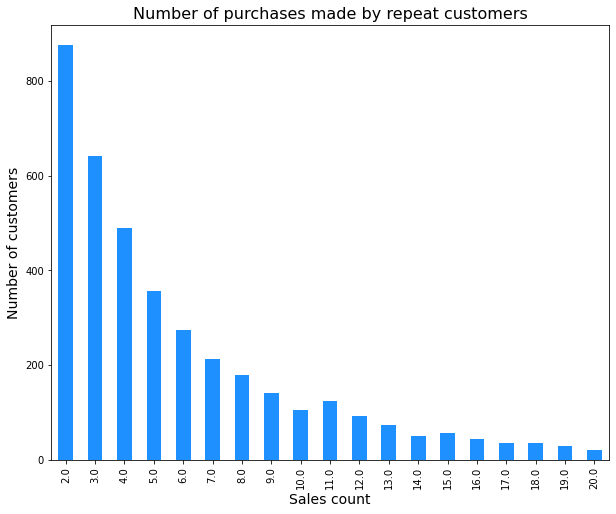

In [53]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

In our analysis, we consider repeat customers who made at least 2 purchases. As you can see, repeat customers tend to make about 12 purchases or less.

#### Average number of days between purchases 

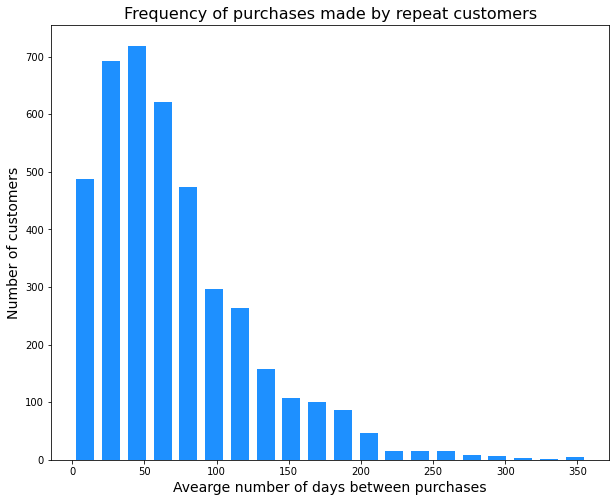

In [54]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16);

As you can see from this plot, the majority of repeat customers tend to make a purchase every 12 to 50 days.

<a id='predictcltv'></a>
## Predict 3-month CLTV

We are going to build a model, which predicts CLTV for 3 months. First, let us slice the data into chunks with 3-month data each and take the last chunk as the target for predictions.

### Prepare data

In [55]:
clv_freq = '3M'

In [56]:
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [57]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [58]:
df_data = df_data.reset_index()

In [59]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2009-12-31,113.50,22.700,5.0
1,12346.0,2010-03-31,117.05,23.410,5.0
2,12346.0,2010-06-30,142.31,142.310,1.0
3,12346.0,2011-03-31,77183.60,77183.600,1.0
4,12347.0,2010-12-31,2035.11,1017.555,2.0


In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   17869 non-null  float64       
 1   InvoiceDate  17869 non-null  datetime64[ns]
 2   sales_sum    17869 non-null  float64       
 3   sales_avg    17869 non-null  float64       
 4   sales_count  17869 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 698.1 KB


For further simplicity, let us encode *InvoiceDate* column and define in which month a purchase was made

In [61]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [62]:
map_date_month

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5',
 '2010-09-30': 'M_6',
 '2010-06-30': 'M_7',
 '2010-03-31': 'M_8',
 '2009-12-31': 'M_9'}

In [63]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])

In [64]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2009-12-31,113.50,22.700,5.0,M_9
1,12346.0,2010-03-31,117.05,23.410,5.0,M_8
2,12346.0,2010-06-30,142.31,142.310,1.0,M_7
3,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
4,12347.0,2010-12-31,2035.11,1017.555,2.0,M_5


In [65]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M_5    2670
M_1    2406
M_2    2161
M_6    2060
M_7    2047
M_3    1991
M_8    1803
M_4    1776
M_9     955
Name: M, dtype: int64

We marked data with a chunk/time period it belongs to. Now, let us create a set with features and target variables. In order to train a model, we have to transfrom the data into tabular data, where each row represent a costomer and each column represent a feature.

In [66]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')

In [67]:
df_features.reset_index()

CustomerID   sales_avg                                                    \
M                       M_2      M_3           M_4       M_5     M_6      M_7   
0       12346.0         NaN      NaN  77183.600000       NaN     NaN   142.31   
1       12347.0  584.910000  509.385    475.390000  1017.555     NaN      NaN   
2       12348.0  310.000000  367.000    227.440000   892.800  222.16      NaN   
3       12349.0         NaN      NaN           NaN  1402.620     NaN   634.26   
4       12350.0         NaN      NaN    334.400000       NaN     NaN      NaN   
...         ...         ...      ...           ...       ...     ...      ...   
5433    18283.0   92.696667  131.170    105.966667    97.675   92.00      NaN   
5434    18284.0         NaN      NaN           NaN   461.680     NaN      NaN   
5435    18285.0         NaN      NaN           NaN       NaN     NaN      NaN   
5436    18286.0         NaN      NaN           NaN       NaN  833.48      NaN   
5437    18287.0         NaN  765.280           NaN   381.500  446.30  1071.61   

                     sales_count  ...           sales_sum                     \
M        M_8     M_9         M_2  ...  M_8  M_9       M_2      M_3       M_4   
0      23.41   22.70         NaN  ...  5.0  5.0       NaN      NaN  77183.60   
1        NaN     NaN         1.0  ...  NaN  NaN    584.91  1018.77    475.39   
2        NaN     NaN         1.0  ...  NaN  NaN    310.00   367.00    227.44   
3        NaN     NaN         NaN  ...  NaN  NaN       NaN      NaN       NaN   
4        NaN     NaN         NaN  ...  NaN  NaN       NaN      NaN    334.40   
...      ...     ...         ...  ...  ...  ...       ...      ...       ...   
5433  118.14     NaN         3.0  ...  3.0  NaN    278.09   524.68    317.90   
5434     NaN     NaN         NaN  ...  NaN  NaN       NaN      NaN       NaN   
5435  427.00     NaN         NaN  ...  1.0  NaN       NaN      NaN       NaN   
5436     NaN  462.95         NaN  ...  NaN  1.0       NaN      NaN       NaN   
5437     NaN     NaN         NaN  ...  NaN  NaN       NaN   765.28       NaN   

                                                
M         M_5     M_6      M_7     M_8     M_9  
0         NaN     NaN   142.31  117.05  113.50  
1     2035.11     NaN      NaN     NaN     NaN  
2      892.80  222.16      NaN     NaN     NaN  
3     1402.62     NaN  1268.52     NaN     NaN  
4         NaN     NaN      NaN     NaN     NaN  
...       ...     ...      ...     ...     ...  
5433   195.35   92.00      NaN  354.42     NaN  
5434   461.68     NaN      NaN     NaN     NaN  
5435      NaN     NaN      NaN  427.00     NaN  
5436      NaN  833.48      NaN     NaN  462.95  
5437   381.50  892.60  1071.61     NaN     NaN  

[5438 rows x 25 columns]

In [68]:
df_features.columns = ['_'.join(col) for col in df_features.columns]

In [69]:
df_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,77183.60,NaN,NaN,142.31,23.41,22.7,NaN,NaN,...,5.0,5.0,NaN,NaN,77183.60,NaN,NaN,142.31,117.05,113.5
12347.0,584.91,509.385,475.39,1017.555,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN,NaN
12348.0,310.00,367.000,227.44,892.800,222.16,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,310.00,367.00,227.44,892.80,222.16,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN,NaN
12350.0,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN


In [70]:
df_features.reset_index(level=0, inplace=True)

In [71]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
0,12346.0,NaN,NaN,77183.60,NaN,NaN,142.31,23.41,22.7,NaN,...,5.0,5.0,NaN,NaN,77183.60,NaN,NaN,142.31,117.05,113.5
1,12347.0,584.91,509.385,475.39,1017.555,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN,NaN
2,12348.0,310.00,367.000,227.44,892.800,222.16,NaN,NaN,NaN,1.0,...,NaN,NaN,310.00,367.00,227.44,892.80,222.16,NaN,NaN,NaN
3,12349.0,NaN,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN,NaN
4,12350.0,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN


We got Null values after pivoting the table. Let us fill in the Null values with 0.

In [72]:
df_features.fillna(0, inplace=True)

In [73]:
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [74]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5438 non-null   float64
 1   sales_avg_M_2    5438 non-null   float64
 2   sales_avg_M_3    5438 non-null   float64
 3   sales_avg_M_4    5438 non-null   float64
 4   sales_avg_M_5    5438 non-null   float64
 5   sales_avg_M_6    5438 non-null   float64
 6   sales_avg_M_7    5438 non-null   float64
 7   sales_avg_M_8    5438 non-null   float64
 8   sales_avg_M_9    5438 non-null   float64
 9   sales_count_M_2  5438 non-null   float64
 10  sales_count_M_3  5438 non-null   float64
 11  sales_count_M_4  5438 non-null   float64
 12  sales_count_M_5  5438 non-null   float64
 13  sales_count_M_6  5438 non-null   float64
 14  sales_count_M_7  5438 non-null   float64
 15  sales_count_M_8  5438 non-null   float64
 16  sales_count_M_9  5438 non-null   float64
 17  sales_sum_M_2 

In [75]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,...,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,...,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,...,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0


Our target variables will be:

In [76]:
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [77]:
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

In [78]:
df_target.shape

(2406, 2)

In [79]:
df_target.head()

,CustomerID,CLV_3M
8,12347.0,1294.32
16,12349.0,1757.55
22,12352.0,311.73
31,12356.0,58.35
33,12357.0,6207.67


In [80]:
df_sample_set = df_features.merge(
                df_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')

In [81]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,...,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,...,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,NaN
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,...,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,1294.32
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,...,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,NaN
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,1757.55
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,NaN


In [82]:
df_sample_set.fillna(0, inplace=True)

In [83]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,...,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,...,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,0.00
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,...,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,1294.32
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,...,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,0.00
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,...,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,1757.55
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,0.00


In [84]:
df_sample_set['CLV_3M'].describe()

count     5438.000000
mean       363.622587
std       1951.861150
min          0.000000
25%          0.000000
50%          0.000000
75%        307.215000
max      68012.350000
Name: CLV_3M, dtype: float64

### Build linear regression

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

In [87]:
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_avg_M_6',
 'sales_avg_M_7',
 'sales_avg_M_8',
 'sales_avg_M_9',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_count_M_6',
 'sales_count_M_7',
 'sales_count_M_8',
 'sales_count_M_9',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5',
 'sales_sum_M_6',
 'sales_sum_M_7',
 'sales_sum_M_8',
 'sales_sum_M_9']

In [88]:
df_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,...,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.000,0.00,142.31,23.41,22.70,0.0,...,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.50,0.00
1,12347.0,584.910000,509.385,475.390000,1017.555,0.00,0.00,0.00,0.00,1.0,...,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.00,1294.32
2,12348.0,310.000000,367.000,227.440000,892.800,222.16,0.00,0.00,0.00,1.0,...,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.00,0.00
3,12349.0,0.000000,0.000,0.000000,1402.620,0.00,634.26,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.00,1757.55
4,12350.0,0.000000,0.000,334.400000,0.000,0.00,0.00,0.00,0.00,0.0,...,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,18283.0,92.696667,131.170,105.966667,97.675,92.00,0.00,118.14,0.00,3.0,...,0.0,278.09,524.68,317.90,195.35,92.00,0.00,354.42,0.00,766.21
5434,18284.0,0.000000,0.000,0.000000,461.680,0.00,0.00,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,461.68,0.00,0.00,0.00,0.00,0.00
5435,18285.0,0.000000,0.000,0.000000,0.000,0.00,0.00,427.00,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,427.00,0.00,0.00
5436,18286.0,0.000000,0.000,0.000000,0.000,833.48,0.00,0.00,462.95,0.0,...,1.0,0.00,0.00,0.00,0.00,833.48,0.00,0.00,462.95,0.00


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)

In [90]:
lin_reg = LinearRegression(n_jobs=1)

In [91]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [92]:
lin_reg.intercept_

63.34386079215807

In [93]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [94]:
coef

,feature,coef
0,sales_avg_M_2,-0.019503
1,sales_avg_M_3,0.383985
2,sales_avg_M_4,-0.492991
3,sales_avg_M_5,-0.404774
4,sales_avg_M_6,-0.181756
5,sales_avg_M_7,-0.064752
6,sales_avg_M_8,-0.056369
7,sales_avg_M_9,0.550061
8,sales_count_M_2,117.946133
9,sales_count_M_3,61.024052


### Evaluate the model

In [95]:
from sklearn.metrics import r2_score, median_absolute_error

In [96]:
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

#### R-Squared

In [97]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.88
R-Squared for Test set: 0.57


R-Squared is the same for the train and test sets. Therefore, we do not have any overfitting or underfitting of the model.

#### Median Absolute Error

In [98]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

MedAE for Train set: 137.13
MedAE for Test set: 141.01


MedAE has a small difference between test and train sets.

In [99]:
y_test.describe()

count     1904.000000
mean       400.930247
std       2306.086184
min          0.000000
25%          0.000000
50%          0.000000
75%        313.552500
max      68012.350000
Name: CLV_3M, dtype: float64

#### Scatter plot

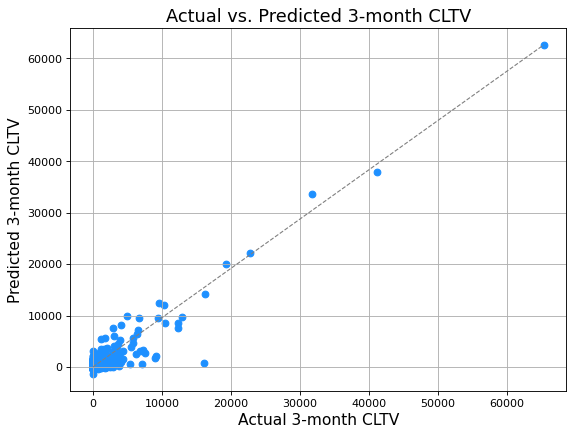

In [100]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='dodgerblue')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual 3-month CLTV', fontsize=14)
plt.ylabel('Predicted 3-month CLTV', fontsize=14)
plt.title('Actual vs. Predicted 3-month CLTV', fontsize=16)
plt.grid()

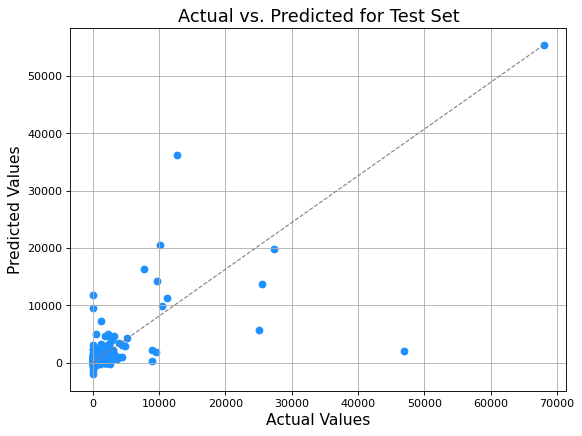

In [101]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.

<a id='summary'></a>
## Summary

* Based on the data analysis, we found that the repeat customers tend to make about 12 purchases or less within a year and the majority of repeat customers tend to make a purchase every 12 to 50 days
* We predicted 3-month CLTV for customers of the online retail using linear regression
* R-squared value for the test set is 0.71, which is not great but it is a good benchmark to try other regression models such as Epsilon-Support Vector Regression and Random Forest Regressor
* By knowing CLTV, we can develop positive ROI strategies and make decisions about how much money to invest in acquiring new customers and retaining existing ones.

<a id='reference'></a>
## References

1. Hwang, Y. H. (2019). Hands-on data science for marketing: Improve your marketing strategies with machine learning using Python and R. Birmingham, UK: Packt Publishing.
2. Müller, A. C., &amp; Guido, S. (2018). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O'Reilly Media.
3. Jeffery, M. (2010). Data-driven marketing the 15 metrics everyone in marketing should know. Hoboken (N.J.), Canada: John Wiley.
4. Customer lifetime Value (CLV) definition - what is customer lifetime Value (CLV). (n.d.). Retrieved February 07, 2021, from https://www.shopify.com/encyclopedia/customer-lifetime-value-clv#:~:text=The%20lifetime%20value%20of%20a,your%20products%2C%20during%20their%20lifetime.

In [102]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from math import sqrt
scaler = MinMaxScaler()
fit = scaler.fit(X_train)
fitted_X_train = fit.transform(X_train)
fitted_X_test = fit.transform(X_test)


lasso = linear_model.Lasso()
#huber.fit(X,y)
#HuberRegressor()

scores = cross_validate(lasso, fitted_X_train, y_train,scoring = ['neg_median_absolute_error', 'r2'], cv=4, return_train_score = True)
print('Mean train set MAE for Huber Regression : {0:.4f}'.format(-scores['train_neg_median_absolute_error'].mean()))
print('Mean train set R2 for Huber Regression : {0:.4f}'.format(scores['train_r2'].mean()))

print('Mean test sets MAE for Huber Regression : {0:.4f}'.format(-scores['test_neg_median_absolute_error'].mean()))
print('Mean test sets R2 for Huber Regression : {0:.4f}'.format(scores['test_r2'].mean()))

<IPython.core.display.Javascript object>

Mean train set MAE for Huber Regression : 109.1306
Mean train set R2 for Huber Regression : 0.8589
Mean test sets MAE for Huber Regression : 107.2729
Mean test sets R2 for Huber Regression : 0.5034


In [113]:
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.formula.api import ols

train_medae = []
test_medae = []

# Create a function called lasso,
def lasso(X_train, y_train, alphas, X_test, y_test):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = all_features
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        yhat_train = lasso.predict(X_train)
        yhat_test = lasso.predict(X_test)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
        print('Train set MedAE for alpha=' + str(alpha) + ' is '+ str(median_absolute_error(y_true=y_train, y_pred=yhat_train)))
        print('Test set MedAE for alpha=' + str(alpha) + ' is ' + str(median_absolute_error(y_true=y_test, y_pred=yhat_test)))
        print('Train set R2 for alpha=' + str(alpha) + ' is ' + str(r2_score(y_train, yhat_train)))
        print('Test set R2 for alpha=' + str(alpha) + ' is ' + str(r2_score(y_test, yhat_test)))
        
        train_medae.append(median_absolute_error(y_true=y_train, y_pred=yhat_train))
        test_medae.append(median_absolute_error(y_true=y_test, y_pred=yhat_test))
                
    # Return the dataframe
    return df

lasso(fitted_X_train, y_train, [.0001, .001, .01, .5, 1, 2, 5, 8, 10, 13], fitted_X_test, y_test)

<IPython.core.display.Javascript object>

Train set MedAE for alpha=0.0001 is 137.12483516339216
Test set MedAE for alpha=0.0001 is 141.00393040962734
Train set R2 for alpha=0.0001 is 0.8823515430021982
Test set R2 for alpha=0.0001 is 0.5663984338836


<IPython.core.display.Javascript object>

Train set MedAE for alpha=0.001 is 136.9845777443779
Test set MedAE for alpha=0.001 is 140.93767068369988
Train set R2 for alpha=0.001 is 0.8823514415935709
Test set R2 for alpha=0.001 is 0.5666410988346904


<IPython.core.display.Javascript object>

Train set MedAE for alpha=0.01 is 135.28428562006332
Test set MedAE for alpha=0.01 is 140.71155232283098
Train set R2 for alpha=0.01 is 0.8823411108366263
Test set R2 for alpha=0.01 is 0.5690581436389648


<IPython.core.display.Javascript object>

Train set MedAE for alpha=0.5 is 113.40722467298609
Test set MedAE for alpha=0.5 is 127.02698073762537
Train set R2 for alpha=0.5 is 0.8740904147464427
Test set R2 for alpha=0.5 is 0.6178543240824255


<IPython.core.display.Javascript object>

Train set MedAE for alpha=1 is 106.2919185444338
Test set MedAE for alpha=1 is 118.61181286462296
Train set R2 for alpha=1 is 0.8624423935849912
Test set R2 for alpha=1 is 0.6318928749836876


<IPython.core.display.Javascript object>

Train set MedAE for alpha=2 is 97.09618063998104
Test set MedAE for alpha=2 is 103.0052239557229
Train set R2 for alpha=2 is 0.8495821412349172
Test set R2 for alpha=2 is 0.6387411599020253


<IPython.core.display.Javascript object>

Train set MedAE for alpha=5 is 108.75030450369778
Test set MedAE for alpha=5 is 112.5890206511118
Train set R2 for alpha=5 is 0.826534778993187
Test set R2 for alpha=5 is 0.6474661194259186


<IPython.core.display.Javascript object>

Train set MedAE for alpha=8 is 113.03786289675904
Test set MedAE for alpha=8 is 119.38246045048889
Train set R2 for alpha=8 is 0.8014430365673704
Test set R2 for alpha=8 is 0.6490903238311521


<IPython.core.display.Javascript object>

Train set MedAE for alpha=10 is 119.37488973723895
Test set MedAE for alpha=10 is 123.93577720127104
Train set R2 for alpha=10 is 0.7784485878892745
Test set R2 for alpha=10 is 0.6467538361529628


<IPython.core.display.Javascript object>

Train set MedAE for alpha=13 is 127.41503224727566
Test set MedAE for alpha=13 is 129.3799846367932
Train set R2 for alpha=13 is 0.7392398653281844
Test set R2 for alpha=13 is 0.6349986619477689


,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 8.000000,Alpha = 10.000000,Alpha = 13.000000
0,sales_avg_M_2,-139.268686,-137.151384,-116.422764,0.000000,0.000000,0.000000,0.000000,278.401314,508.927297,914.049395
1,sales_avg_M_3,5106.807496,5085.742909,4874.270801,568.417812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,sales_avg_M_4,-38045.264106,-37996.744202,-37500.059563,-18730.601813,-5170.884922,-0.000000,-0.000000,0.000000,0.000000,0.000000
3,sales_avg_M_5,-2444.773875,-2444.415592,-2439.785713,-2300.764854,-2311.085348,-1738.034366,-0.000000,-0.000000,-0.000000,0.000000
4,sales_avg_M_6,-2413.314353,-2408.544736,-2362.205830,-783.491807,-76.264924,-0.000000,0.000000,0.000000,0.000000,0.000000
5,sales_avg_M_7,-527.281635,-528.413491,-539.550612,-770.759120,-288.677358,-0.000000,0.000000,0.000000,0.000000,0.000000
6,sales_avg_M_8,-616.758246,-610.548050,-549.351199,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,sales_avg_M_9,2408.842351,2404.993338,2367.184685,1490.451460,1201.275009,733.473480,0.000000,0.000000,0.000000,0.000000
8,sales_count_M_2,6604.400664,6599.542419,6547.279643,4057.860210,2501.781784,967.657085,0.000000,0.000000,0.000000,0.000000
9,sales_count_M_3,2806.354127,2799.482867,2730.454530,1218.645094,396.189271,0.000000,0.000000,0.000000,0.000000,0.000000


In [114]:
test_medae

[141.00393040962734,
 140.93767068369988,
 140.71155232283098,
 127.02698073762537,
 118.61181286462296,
 103.0052239557229,
 112.5890206511118,
 119.38246045048889,
 123.93577720127104,
 129.3799846367932]

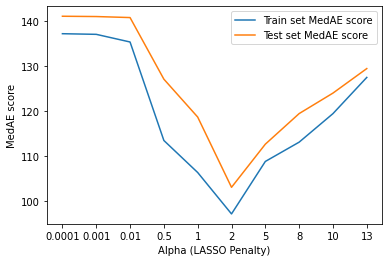

In [149]:
# x = [.0001, .001, .01, .5, 1, 2, 5, 8, 10, 13]
# y1 = train_medae
# y2 = test_medae
# # plot lines
# ax.plot(x, y1, label = "Train set MedAE score")
# ax.plot(x, y2, label = "Test set MedAE score")
# plt.xticks(range(len(x)), x, rotation=45)
# plt.legend()
# plt.show()

f, ax = plt.subplots()

x1 = [str(a) for a in x]
l = range(len(x))
y1 = train_medae
y2 = test_medae

ax.plot(l, y1, label = "Train set MedAE score")
ax.plot(l, y2, label = "Test set MedAE score")
ax.set_xticks(l)
ax.set_xticklabels(x1)
# ax.set_labels(x='Alpha (Penalty)', y='MedAE score')
ax.set_xlabel('Alpha (LASSO Penalty)')
ax.set_ylabel('MedAE score')

ax.legend()

In [129]:
test_medae

[141.00393040962734,
 140.93767068369988,
 140.71155232283098,
 127.02698073762537,
 118.61181286462296,
 103.0052239557229,
 112.5890206511118,
 119.38246045048889,
 123.93577720127104,
 129.3799846367932]

[Text(0, 0, '0.0001'),
 Text(1, 0, '0.001'),
 Text(2, 0, '0.01'),
 Text(3, 0, '0.5'),
 Text(4, 0, '1'),
 Text(5, 0, '2'),
 Text(6, 0, '5'),
 Text(7, 0, '8'),
 Text(8, 0, '10'),
 Text(9, 0, '13')]

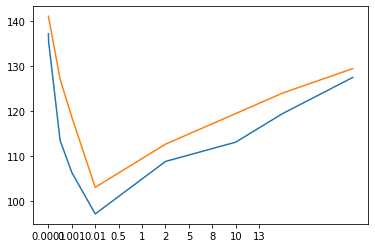

In [127]:
f, ax = plt.subplots()

ax.plot(x, y1, label = "Train set MedAE score")
ax.plot(x, y2, label = "Test set MedAE score")

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

                                 OLS Regression Results                                
Dep. Variable:                 CLV_3M   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              1116.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        19:41:08   Log-Likelihood:                         -27626.
No. Observations:                3534   AIC:                                  5.530e+04
Df Residuals:                    3510   BIC:                                  5.545e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

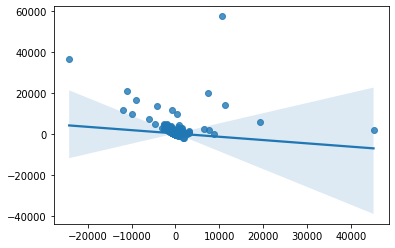

In [150]:
# Lasso

from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import pinv_extended
# Create a function called lasso,
def lasso(X_train, y_train, alphas, X_test, y_test):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
#         # Create a lasso regression with that alpha value,
#         lasso = Lasso(alpha=alpha)
        
#         # Fit the lasso regression
#         lasso.fit(X_train, y_train)
        
#         yhat_train = lasso.predict(X_train)
#         yhat_test = lasso.predict(X_test)
        
#         # Create a column name for that alpha value
#         column_name = 'Alpha = %f' % alpha

#         # Create a column of coefficient values
#         df[column_name] = lasso.coef_
        model = sm.OLS(y_train, X_train)
        result = model.fit_regularized(
                            method = 'elastic_net',
                            alpha = alpha,
                            L1_wt = 1,
                            #refit = True,
                            refit = False,
                            )
        pinv_wexog,_ = pinv_extended(model.wexog)
        normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
        final = sm.regression.linear_model.OLSResults(model, 
                                          result.params, 
                                          normalized_cov_params)
        print(final.summary())
        yhat_train = final.predict(X_train)
        yhat_test = final.predict(X_test)


#         ols_df = pd.concat([X_train,y_train], axis=1)
        
#         linear_model = ols(ols_df.columns[-1] + ' ~ .' , data=ols_df, alpha=alpha, L1_wt=1).fit()
  
#         # display model summary
#         print(linear_model.summary())

#         # modify figure size
#         fig = plt.figure(figsize=(14, 8))

#         # creating regression plots
#         fig = sm.graphics.plot_regress_exog(linear_model,
#                                             'Head_size',
#                                             fig=fig)
        
#         yhat_train = linear_model.predict(X_train)
#         yhat_test = linear_model.predict(X_test)
        
        print('Train set MedAE for alpha=' + str(alpha) + ' is '+ str(median_absolute_error(y_true=y_train, y_pred=yhat_train)))
        print('Test set MedAE for alpha=' + str(alpha) + ' is ' + str(median_absolute_error(y_true=y_test, y_pred=yhat_test)))
        print('Train set R2 for alpha=' + str(alpha) + ' is ' + str(r2_score(y_train, yhat_train)))
        print('Test set R2 for alpha=' + str(alpha) + ' is ' + str(r2_score(y_test, yhat_test)))
        
        sns.regplot(x = y_test - yhat_test, y = yhat_test, data = None)
        
# lasso(fitted_X_train, y_train, [.0001, .5, 2, 10, 11], fitted_X_test, y_test)
lasso(X_train, y_train, [2], X_test, y_test)
